In [ ]:
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 #ausführen von datei "notebook_data_rate.ipynb"

## Importieren von Bibliotheken

In [ ]:
#!pip install scikit-learn

In [33]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
from nltk.text import Text
from collections import Counter
from nltk.stem import WordNetLemmatizer
import string
import spacy
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel

-----------------------

## Text einlesen

In [2]:
def read_file(filename):
    
  with open(filename, "r", encoding="utf-8") as file:
    text = file.read()
  return text

# Beispiel für die Verwendung der Funktion#
filename = r"C:\Users\Simon\Documents\Uni Würzburg\Digital Humanities\Bachelorarbeit\datasets\my_trump\00_cleaned_files/all_files.txt" #windows
#filename = "/home/simon/Dokumente/Uni Würzburg/Digital Humanities/Bachelorarbeit/datasets/my_trump/00_cleaned_files/all_files.txt"
text = read_file(filename)

In [3]:
def remove_punctuation(text):
  return text.translate(str.maketrans("", "", string.punctuation))


#tnterpunktion aus allen sätzen entfernen
text = remove_punctuation(text)

print(text[:500])

Thank you very much Thank you

Good evening I’d like to provide the American people with an update on our efforts to protect the integrity of our very important 2020 election If you count the legal votes I easily win If you count the illegal votes they can try to steal the election from us If you count the votes that came in late we’re looking to them very strongly but a lot of votes came in late

I’ve already decisively won many critical states including massive victories in Florida Iowa Indian


-------------------------

## Text editieren

In [4]:
words = text.lower().split()
print(words[:20])

['thank', 'you', 'very', 'much', 'thank', 'you', 'good', 'evening', 'i’d', 'like', 'to', 'provide', 'the', 'american', 'people', 'with', 'an', 'update', 'on', 'our']


In [5]:
#stopwords-entferner
stopwords = set(nltk.corpus.stopwords.words("english"))

filtered_words = [word for word in words if word not in stopwords]
print(filtered_words[:20])

#clean_text = ' '.join(filtered_words)
#print(clean_text)

['thank', 'much', 'thank', 'good', 'evening', 'i’d', 'like', 'provide', 'american', 'people', 'update', 'efforts', 'protect', 'integrity', 'important', '2020', 'election', 'count', 'legal', 'votes']


In [6]:
#stemmed_words
stemmer = SnowballStemmer("english")
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print(stemmed_words[:20])

['thank', 'much', 'thank', 'good', 'even', "i'd", 'like', 'provid', 'american', 'peopl', 'updat', 'effort', 'protect', 'integr', 'import', '2020', 'elect', 'count', 'legal', 'vote']


In [7]:
#lemmatisierung
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print(lemmatized_words[:20])

['thank', 'much', 'thank', 'good', 'evening', 'i’d', 'like', 'provide', 'american', 'people', 'update', 'effort', 'protect', 'integrity', 'important', '2020', 'election', 'count', 'legal', 'vote']


--------------

## Text untersuchen

In [8]:
#gesamter text
print(len(words))

672520


In [9]:
#text ohne stoppwörter
print(len(filtered_words))

341659


#### Word Cloud

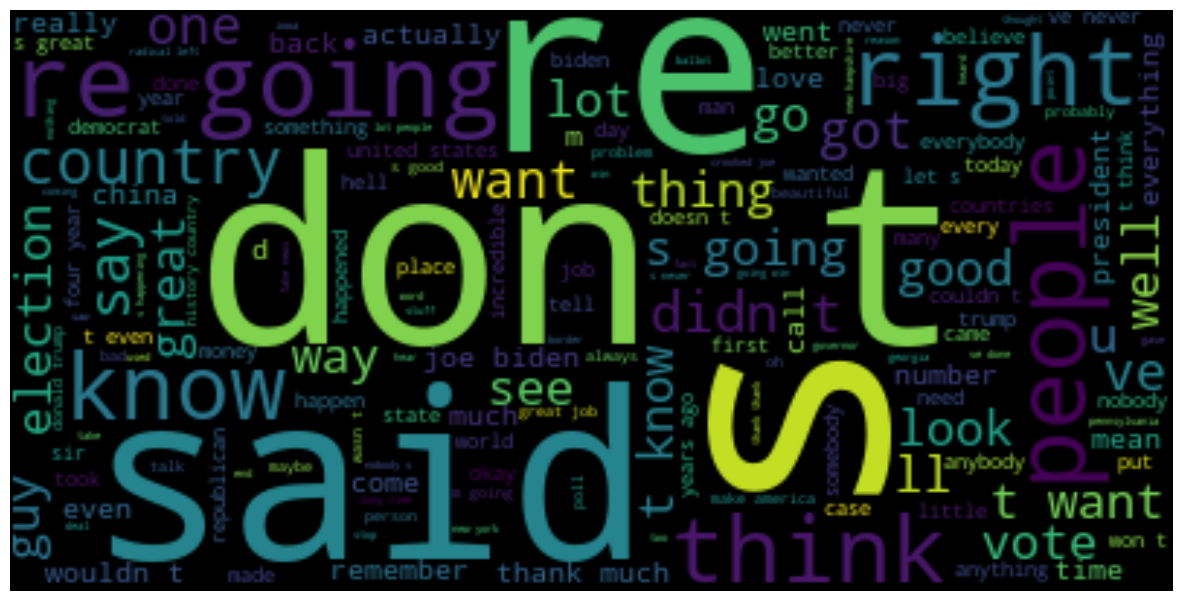

In [10]:
#wordcloud ohne stemming, aber mit stoppwort-entfernung: filtered_words

#größe der grafik
fig = plt.figure(figsize=(15, 15)) #besser: 15, 15
ax = fig.add_subplot(111)

#word cloud erstellen
wordcloud = WordCloud(background_color="black", colormap="viridis").generate(" ".join(filtered_words))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

plt.show()

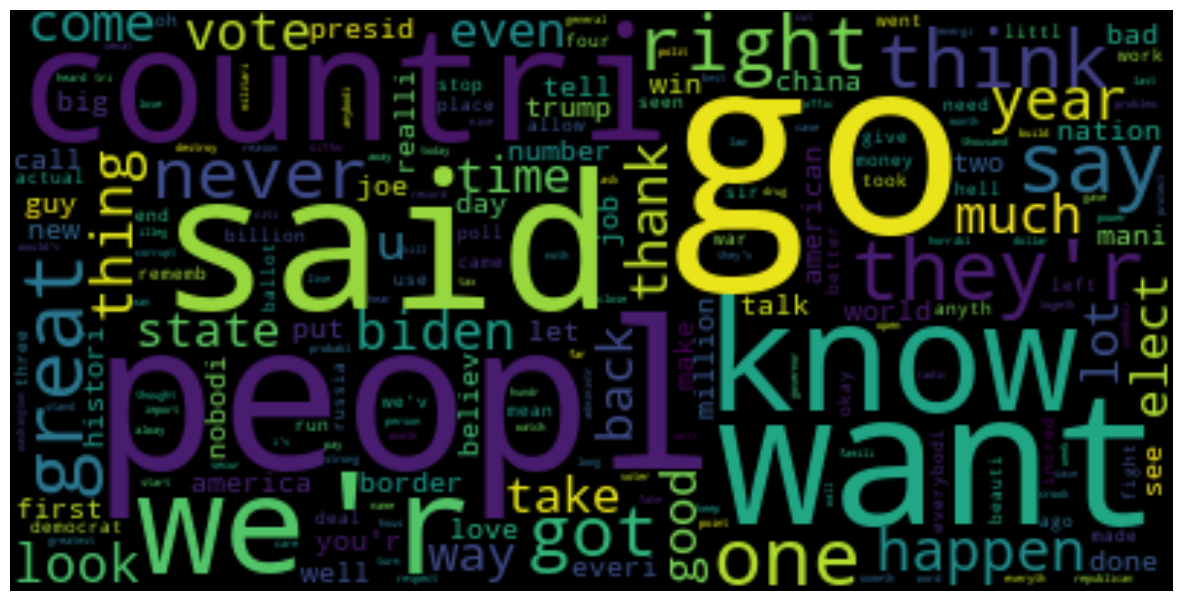

In [11]:
#wordcloud mit stemming

from wordcloud import WordCloud

#größe der grafik
fig = plt.figure(figsize=(15, 15)) #besser: 15, 15
ax = fig.add_subplot(111)

#word cloud erstellen
wordcloud = WordCloud(collocations=False, background_color="black", colormap="viridis").generate(" ".join(stemmed_words))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

plt.show()

#### Satz-Untersuchungen

In [12]:
textList = Text(filtered_words)

In [13]:
#vorkommen eines wortes in bestimmten sätzen
tokens_concordance_mk = word_tokenize("".join(map(str, text.lower())))
#print(tokens_concordance[:10])
textList_mk = Text(tokens_concordance_mk)
textList_mk.concordance('war', width=80, lines=5)

Displaying 5 of 398 matches:
 honor you can get former prisoner of war and vietnam veteran captain ken wells
 you these are great people and world war ii hero and dday veteran very very br
us i don ’ t know something about the war something about brave people right mi
ried to get it and instead of endless war in the middle east we ’ re forging pe
be the one right but they ’ re waging war on our police you know that we have a


In [14]:
#wörter die in ähnlicher reichweite vorhanden sind
textList.similar("war")

people thing going done back said russia vote say like us numbers
think things would right look deal crime administration


In [15]:
#kontext in dem 2 wörter stehen
textList.common_contexts(["war", "trump"])

No common contexts were found


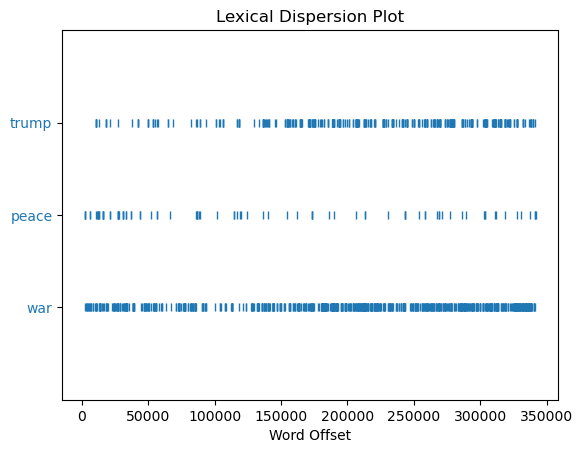

In [16]:
#dispersion plot: in welchen bereichen wörter jeweils vorkommen nach n wörtern 
textList.dispersion_plot(["war", "peace", "trump"])

In [17]:
#20 most frequent words
word_counts = Counter(filtered_words)
word_counts.most_common(20)

[('going', 4600),
 ('people', 4064),
 ('it’s', 4038),
 ('said', 3336),
 ('don’t', 3115),
 ('we’re', 2835),
 ('they’re', 2750),
 ('know', 2748),
 ('country', 2668),
 ('want', 2638),
 ('great', 2635),
 ('like', 2563),
 ('that’s', 2380),
 ('one', 2246),
 ('think', 2149),
 ('say', 2045),
 ('right', 1994),
 ('get', 1992),
 ('got', 1925),
 ('never', 1897)]

Nur Substantive herausfiltern

In [18]:
#cut nötig, da nlp-modul nicht mehr als 2000000 wörter in einem text schafft (sonst: kernel dies)
filter_words = " ".join(filtered_words)
filter_words = filter_words[:1500000]
print(filter_words[:1000])

thank much thank good evening i’d like provide american people update efforts protect integrity important 2020 election count legal votes easily win count illegal votes try steal election us count votes came late we’re looking strongly lot votes came late i’ve already decisively many critical states including massive victories florida iowa indiana ohio name many victories despite historic election interference big media big money big tech everybody saw historic numbers pollsters got knowingly wrong got knowingly wrong polls ridiculous everybody knew time blue wave predicted thought going big blue wave false done suppression reasons instead big red wave it’s properly acknowledged actually media think impressed fact doesn’t us good kept senate despite twice many seats defend democrats really much competitive states fantastic job senate think we’re proud what’s happened many seats defend spent almost 200 million senate races south carolina kentucky alone two races hundreds millions dollar

In [21]:
#!python -m spacy download en_core_web_sm

In [22]:
#laden des sprachmodells
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1500000

#analysieren des texts
doc = nlp(filter_words)

#extrahieren der substantive
substantives = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]

#drucken der ergebnisse
#print(substantives)

#filtern der substantive nach länge
substantives = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and len(token.lemma_) > 4]

#extrahieren von benannten entitäten
s_entities = [(entity.text, entity.label_) for entity in doc.ents]

#drucken der erweiterten ergebnisse
print(substantives[:20])
print()
print(s_entities[:20])

['evening', 'people', 'effort', 'integrity', 'election', 'count', 'election', 'count', 'state', 'victory', 'victory', 'election', 'medium', 'money', 'number', 'pollster', 'suppression', 'reason', 'medium', 'state']

[('american', 'NORP'), ('2020', 'CARDINAL'), ('florida', 'GPE'), ('indiana', 'GPE'), ('ohio', 'GPE'), ('senate', 'ORG'), ('democrats', 'NORP'), ('senate', 'ORG'), ('almost 200 million', 'CARDINAL'), ('senate', 'ORG'), ('south carolina', 'GPE'), ('kentucky', 'GPE'), ('two', 'CARDINAL'), ('hundreds millions dollars', 'MONEY'), ('first', 'ORDINAL'), ('zero', 'CARDINAL'), ('kevin mccarthy', 'PERSON'), ('today', 'DATE'), ('zero', 'CARDINAL'), ('zero', 'CARDINAL')]


In [23]:
#20 am häufigsten vorkommende wörter
sub_counts = Counter(substantives)
sub_counts.most_common(20)

[('people', 2574),
 ('country', 1865),
 ('thing', 1189),
 ('election', 971),
 ('state', 662),
 ('number', 626),
 ('world', 539),
 ('border', 510),
 ('history', 497),
 ('ballot', 436),
 ('president', 395),
 ('nation', 380),
 ('thousand', 328),
 ('trump', 323),
 ('place', 310),
 ('money', 304),
 ('dollar', 296),
 ('biden', 292),
 ('month', 257),
 ('woman', 250)]

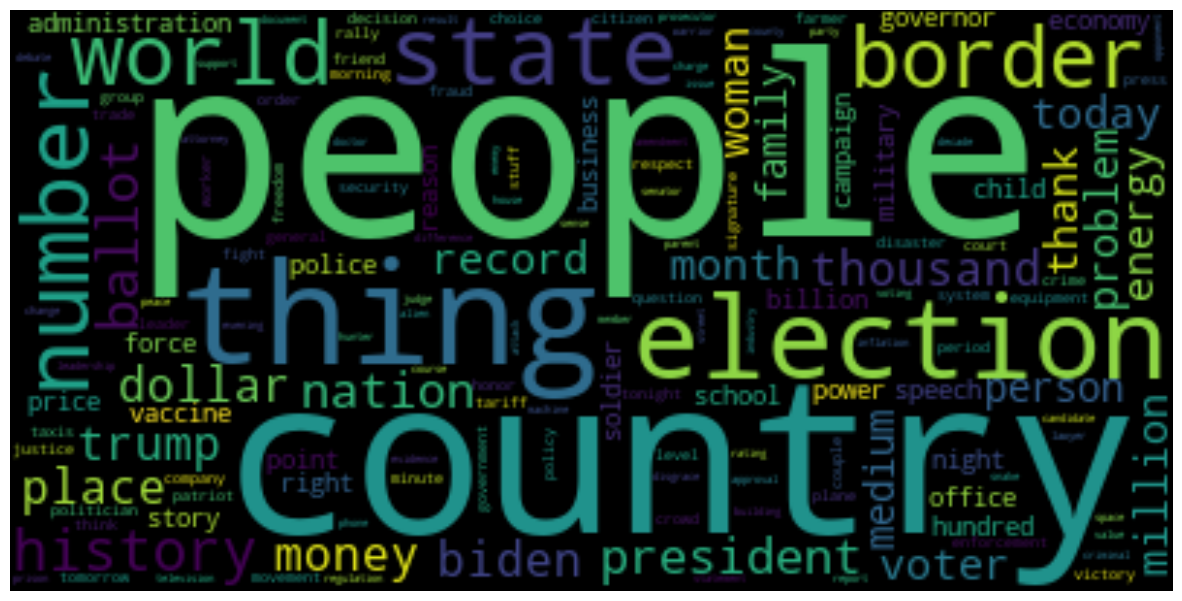

In [24]:
#grafik für word cloud
fig = plt.figure(figsize=(15, 15)) #besser: 15, 15
ax = fig.add_subplot(111)

#word cloud erstellen
wordcloud = WordCloud(collocations=False, background_color="black", colormap="viridis").generate(" ".join(substantives))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

plt.show()

Nur Verben herausfiltern

In [25]:
#extrahieren der substantive
verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]

#drucken der ergebnisse
#print(verbs)

#filtern der substantive nach länge
verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB" and len(token.lemma_) > 4]

#extrahieren von benannten entitäten
v_entities = [(entity.text, entity.label_) for entity in doc.ents]

#erucken der erweiterten ergebnisse
print(verbs[:20])
print()
print(v_entities[:20])

['thank', 'provide', 'update', 'protect', 'count', 'include', 'interference', 'predict', 'think', 'acknowledge', 'think', 'defend', 'think', 'happen', 'spend', 'believe', 'think', 'elect', 'republican', 'include']

[('american', 'NORP'), ('2020', 'CARDINAL'), ('florida', 'GPE'), ('indiana', 'GPE'), ('ohio', 'GPE'), ('senate', 'ORG'), ('democrats', 'NORP'), ('senate', 'ORG'), ('almost 200 million', 'CARDINAL'), ('senate', 'ORG'), ('south carolina', 'GPE'), ('kentucky', 'GPE'), ('two', 'CARDINAL'), ('hundreds millions dollars', 'MONEY'), ('first', 'ORDINAL'), ('zero', 'CARDINAL'), ('kevin mccarthy', 'PERSON'), ('today', 'DATE'), ('zero', 'CARDINAL'), ('zero', 'CARDINAL')]


In [26]:
#20 most frequent words
verb_counts = Counter(verbs)
verb_counts.most_common(20)

[('think', 1519),
 ('happen', 1245),
 ('thank', 703),
 ('believe', 417),
 ('leave', 404),
 ('remember', 372),
 ('fight', 305),
 ('allow', 274),
 ('build', 274),
 ('start', 265),
 ('stand', 262),
 ('bring', 257),
 ('destroy', 215),
 ('watch', 201),
 ('include', 180),
 ('protect', 160),
 ('understand', 154),
 ('become', 143),
 ('spend', 126),
 ('respect', 119)]

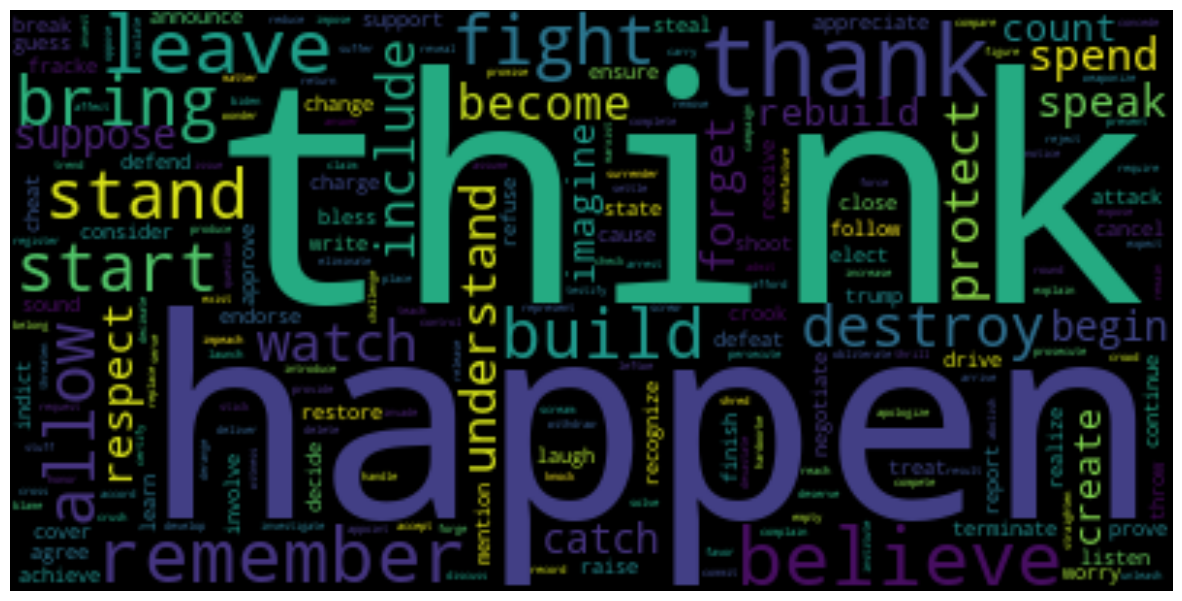

In [27]:
#grafik für word cloud
fig = plt.figure(figsize=(15, 15)) #besser: 15, 15
ax = fig.add_subplot(111)

#word cloud erstellen
wordcloud = WordCloud(collocations=False, background_color="black", colormap="viridis").generate(" ".join(verbs))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

plt.show()

Nur Adjektive herausfiltern

In [28]:
#extrahieren der substantive
adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]

#drucken der ergebnisse
#print(adjectives)

#filtern der substantive nach länge
adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ" and len(token.lemma_) > 4]

#extrahieren von benannten entitäten
a_entities = [(entity.text, entity.label_) for entity in doc.ents]

#drucken der erweiterten ergebnisse
print(adjectives[:20])
print()
print(a_entities[:20])

['thank', 'american', 'important', 'legal', 'illegal', 'steal', 'critical', 'massive', 'historic', 'historic', 'wrong', 'wrong', 'ridiculous', 'impressed', 'competitive', 'fantastic', 'proud', 'overall', 'national', 'major']

[('american', 'NORP'), ('2020', 'CARDINAL'), ('florida', 'GPE'), ('indiana', 'GPE'), ('ohio', 'GPE'), ('senate', 'ORG'), ('democrats', 'NORP'), ('senate', 'ORG'), ('almost 200 million', 'CARDINAL'), ('senate', 'ORG'), ('south carolina', 'GPE'), ('kentucky', 'GPE'), ('two', 'CARDINAL'), ('hundreds millions dollars', 'MONEY'), ('first', 'ORDINAL'), ('zero', 'CARDINAL'), ('kevin mccarthy', 'PERSON'), ('today', 'DATE'), ('zero', 'CARDINAL'), ('zero', 'CARDINAL')]


In [29]:
#20 most frequent words
adj_counts = Counter(adjectives)
adj_counts.most_common(20)

[('great', 1990),
 ('right', 607),
 ('american', 396),
 ('incredible', 375),
 ('little', 332),
 ('first', 297),
 ('beautiful', 234),
 ('corrupt', 233),
 ('horrible', 231),
 ('strong', 228),
 ('radical', 214),
 ('illegal', 202),
 ('tough', 202),
 ('different', 192),
 ('tremendous', 186),
 ('military', 186),
 ('important', 173),
 ('terrible', 166),
 ('whole', 157),
 ('political', 151)]

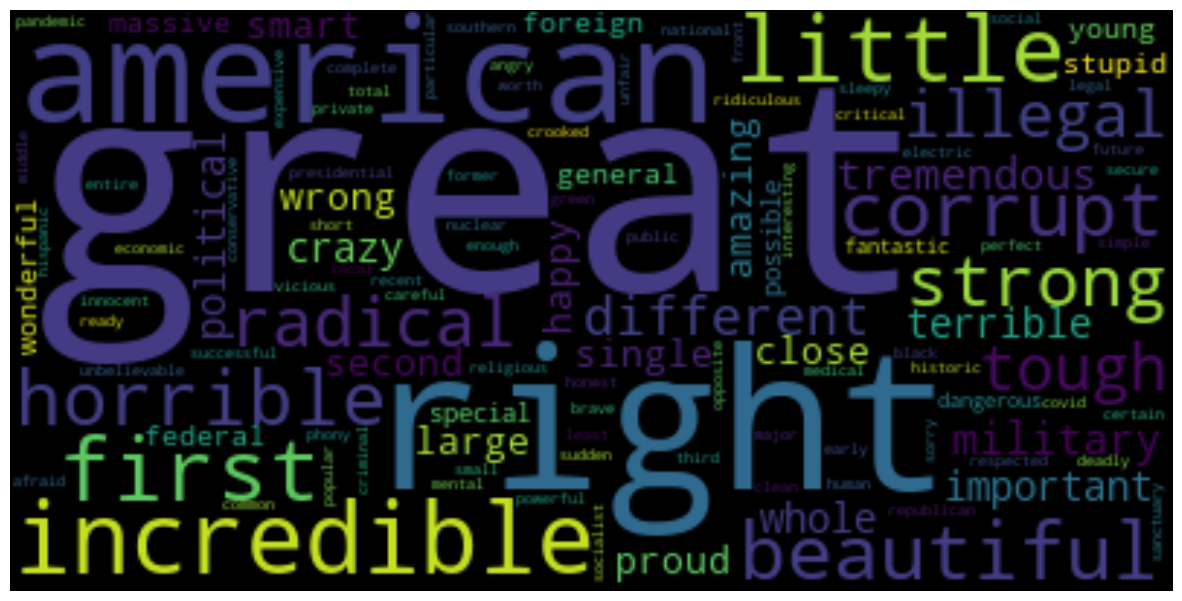

In [30]:
cloud_adjectives = " ".join(adjectives)

#grafik für word cloud
fig = plt.figure(figsize=(15, 15)) #besser: 15, 15
ax = fig.add_subplot(111)

#word cloud erstellen
wordcloud = WordCloud(collocations=False, background_color="black", colormap="viridis").generate(cloud_adjectives)
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

plt.show()

Bigramme finden

In [32]:
tokens = nltk.word_tokenize(text)

#neufilterung der stoppwörter, da eine liste nicht gelesen werden kann
stop_words = set(stopwords.words('english'))

#entfernen der Stoppwörter
filtered_tokens = [token for token in tokens if token not in stop_words]

text = " ".join(filtered_tokens)
print(" war " in text)

True


In [34]:
import string


texti = text.translate(str.maketrans('', '', string.punctuation))

#bigramme aus token erstellen
bigrams = list(nltk.bigrams(tokens))

#häufigkeit jedes bigramms zählen
bigram_counts = {}
for bigram in bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

#bigramme nach häufigkeit sortieren
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

#erste 10 bigramme ausgeben
top_10_bigrams = sorted_bigrams[:10]

#iterieren für ausgabe
for bigram, count in top_10_bigrams:
    print(bigram, count)


('’', 's') 12147
('’', 't') 7670
('’', 're') 6823
('going', 'to') 3842
('don', '’') 2956
('I', '’') 2628
('we', '’') 2404
('they', '’') 2255
('it', '’') 2197
('of', 'the') 2174


---------------

#### Wortlängen

In [35]:
long_words = filtered_words
long_words = [w for w in long_words if len(w) > 14]
print(set(sorted(long_words)))

{'confidentiality', 'recommendations', 'wellrepresented', 'entrepreneurial', 'misunderstanding”', 'declassification', 'bureaucratically', 'hospitalizations', 'extraordinarily', '“reconstruction', 'selfdestructive', 'hundredandsomeodd', 'psychologically', 'firstinthenation', 'africanamerican', 'hydroxychloroquine', 'nontransparent”', 'democratappointed', 'inappropriately', 'catchandrelease', 'discriminatory”', 'nhdonaldjtrumpcom', 'underappreciated', 'reconstruction”', 'mostfavorednation', 'decertification', 'gasolinepowered', 'christianhating', 'environmentally', 'schwarzenegger”', 'misrepresentation', 'hispanicamerican', 'unceremoniously', 'superintendents', 'electionchanging', 'environmentalists', 'nvdonaldjtrumpcom', 'indemnification', 'representatives', 'africanamericans', 'disinformation”', 'instantaneously', 'electionrelated', 'environmentalist', 'neverbroughtbefore', 'administrations', 'claustrophobic…', 'desanctimonious', 'indiscriminately', 'desanctimonious’s', 'beautifullooki

-----------

### Ähnlichkeiten finden

#### Generelle Ähnlichkeiten

In [36]:
#zu untersuchdenden term eingeben
#term = input("Zu untersuchenden Term eingeben...")
term = "war"

In [37]:
model = Word2Vec([words],min_count=1)

In [38]:
model.wv[term]

array([ 0.00036124,  0.00289555, -0.00763147, -0.00575812,  0.00147725,
       -0.00607155,  0.00573635,  0.00641863,  0.00772453,  0.00675368,
       -0.00118123, -0.0046323 , -0.00661515,  0.00995766, -0.0008123 ,
        0.00293097, -0.00766131, -0.00169484,  0.00281079,  0.006964  ,
        0.00366723, -0.00474693,  0.00753155,  0.00915086, -0.00019126,
        0.00739669,  0.00477425,  0.00978728,  0.00025823,  0.00429196,
        0.00329126, -0.004232  , -0.00442898,  0.00624715, -0.00745645,
       -0.00424919, -0.00952004, -0.00154564,  0.00159465,  0.00380775,
       -0.00047339, -0.00833951,  0.00551878,  0.00813303, -0.00216442,
        0.00897577,  0.00828857,  0.00877209, -0.00156516,  0.00714631,
        0.00183853,  0.00109717,  0.00959433, -0.00525568, -0.00599343,
       -0.00880576,  0.00785062, -0.00887101, -0.00709236, -0.00065882,
       -0.00813767,  0.00203094,  0.00995984, -0.00905477, -0.00592332,
        0.00375923,  0.00058133,  0.00404888,  0.00838643,  0.00

In [39]:
len(model.wv[term])

100

In [40]:
model.wv.most_similar(term, topn=10)

[('homelessness', 0.418315589427948),
 ('loyalty', 0.3579373061656952),
 ('obliterated', 0.35357773303985596),
 ('eating”', 0.34591925144195557),
 ('poisons', 0.344616562128067),
 ('highness', 0.3331886827945709),
 ('food’s', 0.3242700397968292),
 ('ideally', 0.3170396685600281),
 ('windmill', 0.31574827432632446),
 ('university', 0.3069469630718231)]

#### Semantische Ähnlichkeiten

In [ ]:
model.wv.most_similar(positive=['war', 'great'], negative=['joe'], topn=5)

In [41]:
#vektor-dimensionen einschränken auf 50
model = Word2Vec([words], vector_size=50)
model.wv.most_similar(term)
model.wv.most_similar(term, topn=5)
model.wv.most_similar(positive=['war', 'great'], negative=['joe'], topn=5)

[('2015', 0.4650530517101288),
 ('corporations', 0.446318656206131),
 ('lawsuits', 0.43984371423721313),
 ('“which', 0.4303748607635498),
 ('professor', 0.42006421089172363)]

In [42]:
#vektor-dimensionen einschränken auf 300
model = Word2Vec([words], vector_size=300)
model.wv.most_similar(term)
model.wv.most_similar(term, topn=5)
model.wv.most_similar(positive=['war', 'great'], negative=['joe'], topn=5)

[('aluminum', 0.22853851318359375),
 ('errors', 0.1840265691280365),
 ('armloads', 0.1760292947292328),
 ('discrimination', 0.1741052120923996),
 ('tubes', 0.16591905057430267)]

#### Wort-Vektoren visualisieren

In [43]:
X = model.wv[model.wv.key_to_index]

In [44]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [45]:
#zufallsauswahl von 100 wörtern
import random
random.seed(2)

In [46]:
ind = random.sample(range(0,len(X)),100)
result_random = result[ind]
all_words = list(model.wv.key_to_index)
model_words = [all_words[i] for i in ind]

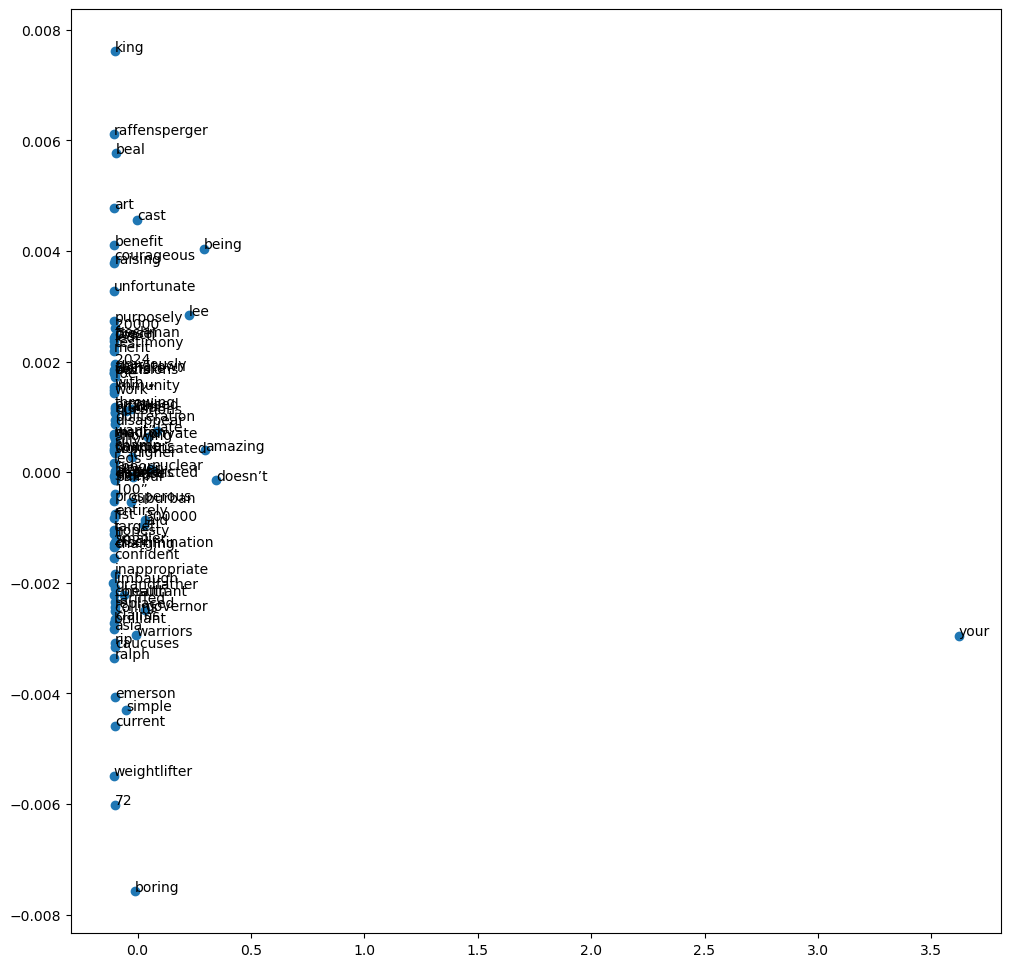

In [47]:
plt.figure(figsize=(12,12))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(model_words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()
#ergebnis: zusammengehörende wörter treten nah beieinander auf

--------

## Die Skipgram-Methode

Sie dient dazu, Wörter in einem Vektorraum abzubilden, der Sinnzusammenhänge zwischen Wörtern widerspiegelt. Man sagt auch, die Skip-Gram-Methode erzeuge Word Embeddings.

Anders ausgedrückt: Die Skip-Gram-Methode versucht ausgehend von einem Wort vorherzusagen, welche Wörter wahrscheinlich in dessen Nähe im Text vorkommen. Dabei behandelt sie das Zielwort als Eingabe und maximiert die Wahrscheinlichkeit, die umliegenden Wörter (Kontextwörter) innerhalb eines definierten Fensters korrekt vorherzusagen.

Einfach gesagt: Bekommt die Skip-Gram-Methode ein Wort, soll sie raten, welche Wörter häufig in dessen Nähe auftauchen. So lernt sie mit der Zeit, welche Wörter ähnliche Bedeutungen haben.

In [48]:
model = Word2Vec([words], vector_size=100, sg=1)

In [49]:
model.wv.most_similar("war")

[('tucker', 0.3579373061656952),
 ('heads', 0.35357773303985596),
 ('limbaugh', 0.31574827432632446),
 ('misinformation', 0.2895541489124298),
 ('filthy', 0.28232577443122864),
 ('disappointed', 0.2781981825828552),
 ('“ah', 0.267294704914093),
 ('insulin', 0.26670315861701965),
 ('murder', 0.26602354645729065),
 ('laying', 0.26485466957092285)]

In [50]:
model.wv.most_similar("war", topn=5)

[('tucker', 0.3579373061656952),
 ('heads', 0.35357773303985596),
 ('limbaugh', 0.31574827432632446),
 ('misinformation', 0.2895541489124298),
 ('filthy', 0.28232577443122864)]

In [51]:
model.wv.most_similar(positive=['war', 'great'], negative=['joe'], topn=5)

[('tucker', 0.3566852807998657),
 ('heads', 0.35278260707855225),
 ('limbaugh', 0.3191290497779846),
 ('misinformation', 0.29245883226394653),
 ('disappointed', 0.27505987882614136)]

----------

## Sätze untersuchen

#### Cleaning

In [54]:
def read_file(filename):
    
  with open(filename, "r", encoding="utf-8") as file:
    text = file.read()
  return text

filename = r"C:\Users\Simon\Documents\Uni Würzburg\Digital Humanities\Bachelorarbeit\datasets\my_trump\00_cleaned_files\all_files.txt" #windows
#filename = "/home/simon/Dokumente/Uni Würzburg/Digital Humanities/Bachelorarbeit/datasets/my_trump/00_cleaned_files/all_files.txt"
text = read_file(filename)

In [55]:
#stoppwörter entfernen
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):

  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  words = text.lower().split()
  words = [word for word in words if word not in stop_words]
  words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(words)

clean_text = preprocess_text(text)

print(clean_text[:100])

thank much. thank you. good evening. i’d like provide american people update effort protect integrit


In [56]:
sent_tok = sent_tokenize(clean_text)
print(sent_tok[:10])

['thank much.', 'thank you.', 'good evening.', 'i’d like provide american people update effort protect integrity important 2020 election.', 'count legal votes, easily win.', 'count illegal votes, try steal election us.', 'count vote came late, we’re looking strongly, lot vote came late.', 'i’ve already decisively many critical states, including massive victory florida, iowa, indiana, ohio, name few.', 'many victory despite historic election interference big media, big money, big tech.', 'everybody saw, historic numbers, pollster got knowingly wrong.']


In [57]:
def remove_punctuation(text):
  return text.translate(str.maketrans("", "", string.punctuation))


#interpunktion aus allen sätzen entfernen
sentences = [remove_punctuation(sentence) for sentence in sent_tok]

sent_tok = sentences

print(sent_tok[:10])

['thank much', 'thank you', 'good evening', 'i’d like provide american people update effort protect integrity important 2020 election', 'count legal votes easily win', 'count illegal votes try steal election us', 'count vote came late we’re looking strongly lot vote came late', 'i’ve already decisively many critical states including massive victory florida iowa indiana ohio name few', 'many victory despite historic election interference big media big money big tech', 'everybody saw historic numbers pollster got knowingly wrong']


#### Latent Dirichlet Allocation

In [58]:
#tokenisierung und lemmatisierung der sätze
tokenized_sätze = [nltk.word_tokenize(satz) for satz in sent_tok]
#lemmatized_sent = [[WordNetLemmatizer().lemmatize(wort) for wort in satz] for satz in tokenized_sätze]

#erstellen eines wörterbuchs und einer dokument-term-matrix
dictionary = corpora.Dictionary(tokenized_sätze)
doc_term_matrix = [dictionary.doc2bow(satz) for satz in tokenized_sätze]

#trainieren eines lda-modells mit 2 themen
lda_model = LdaModel(doc_term_matrix, num_topics=15, id2word=dictionary)

#ausgabe
for topic in lda_model.print_topics():
    print(topic)


(0, '0.112*"’" + 0.060*"ve" + 0.053*"never" + 0.045*"ever" + 0.044*"like" + 0.033*"ll" + 0.028*"i" + 0.026*"done" + 0.022*"thing" + 0.022*"nobody"')
(1, '0.185*"’" + 0.157*"re" + 0.146*"they" + 0.050*"you" + 0.026*"going" + 0.020*"nothing" + 0.015*"always" + 0.015*"people" + 0.014*"saying" + 0.013*"pay"')
(2, '0.118*"think" + 0.096*"great" + 0.050*"them" + 0.047*"good" + 0.037*"job" + 0.026*"it" + 0.024*"well" + 0.023*"believe" + 0.023*"people" + 0.022*"everything"')
(3, '0.087*"one" + 0.043*"trump" + 0.032*"love" + 0.032*"people" + 0.031*"come" + 0.028*"day" + 0.028*"every" + 0.026*"went" + 0.026*"me" + 0.024*"out"')
(4, '0.118*"much" + 0.045*"thank" + 0.041*"man" + 0.040*"this" + 0.038*"everybody" + 0.038*"better" + 0.031*"actually" + 0.030*"hundred" + 0.027*"administration" + 0.027*"oil"')
(5, '0.141*"”" + 0.141*"“" + 0.107*"said" + 0.039*"no" + 0.030*"say" + 0.020*"take" + 0.017*"oh" + 0.016*"bad" + 0.014*"deal" + 0.014*"won"')
(6, '0.090*"you" + 0.066*"world" + 0.061*"look" + 0.06

#### Statistiken zu Sätzen

In [59]:
print(f'Anzahl der Sätze: {len(sent_tok)}')

Anzahl der Sätze: 59298


In [60]:
print(f'Anzahl der Wörter des längsten Satzes: {len(max(sent_tok, key=len).split())}')
print(f'Längster Satz: {max(sent_tok, key=len)}')

Anzahl der Wörter des längsten Satzes: 69
Längster Satz: “dear mr president subsequent election member legislature inundated complaint constituent relating intensity general election integrity important anything else accuracy canvassed results” “in many instances constituent reported earlier inperson ballot may correctly processed tabulated maricopa county officials” “members legislature conducted two public hearing recent week significant evidence fraudulent illegal voting arizona demonstrated expert eyewitness testimony example pima county maricopa county appears 143000 illegal vote actually injected ballot system” think that


In [61]:
avg_length = sum(len(sentence.split()) for sentence in sent_tok) / len(sent_tok)
print(f'Durchschnittliche Satzlänge: {avg_length} Wörter')

Durchschnittliche Satzlänge: 6.135670680292758 Wörter


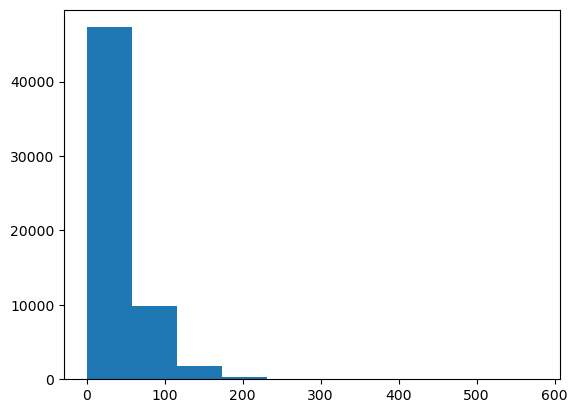

In [62]:
#verteilung der typischer satzlängen
line_lengths = [len(sentence) for sentence in sent_tok]
h = plt.hist(line_lengths)

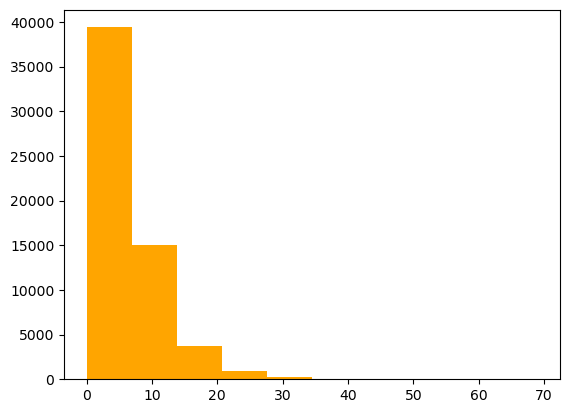

In [63]:
#totale anzahl an wörtern pro satz
total_tokens_per_line = [len(sentence.split()) for sentence in sent_tok]
h = plt.hist(total_tokens_per_line, color='orange')